# Tanzanian Water Pump Analysis with Machine Learning

Author: Brandon Sienkiewicz

## Overview

Over sixty-one million people currently reside in Tanzania and, as a developing nation, access to clean water has become a major concern. Tanzania has a history of limited access to clean water sources and water sanitation resourses. This especially holds true for rural populations. There have been efforts in recent years in order to improve the water infrastructure, there is still much work to be done to bring clean water resources to the people of Tanzania. In addition to the issues with the overall infrastructure, maintainence of water wells has also proven to be an issue. Due to low tariffs and poor efficiency, many water wells need repaired or have completely failed. This is a glaring issue. If infrastructure improves but there is no way to maintain water wells, then the situation in Tanzania will not vastly improve.

## Business Understanding

As mentioned above, access to clean water in Tanzania is a major issue and the upkeep of wells is an issue that needs to be tackled first. In order to tackle this problem, we need to locate the wells in need of repair. My goal is to create a model that can accurately predict the location of wells in need of repair. This model will provide a more thoughrough understanding of which points will fail and will allow for better overall maintenance operations. This will help to limit NGO resources as well as provide a larger impact on providing clean water to the people of Tanzania. To achieve this goal, I utilized data from Taarifa and the Tanzanian Ministry of Water to create machine learning models that predict the state of wells throughout Tanzania.

## Data Cleaning and Exploratory Data Analysis

First, all relevant imports were imported and the data was read into the notebook as DataFrames.

In [197]:
import pandas as pd
import numpy as np
import math
import xgboost

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler,\
FunctionTransformer

from sklearn.pipeline import Pipeline

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.compose import ColumnTransformer,  make_column_selector as selector

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [198]:
sub = pd.read_csv('data/SubmissionFormat.csv')
X_te = pd.read_csv('data/TestSetValues.csv')
train_label = pd.read_csv('data/TrainingSetLabels.csv')
X_t = pd.read_csv('data/TrainingSetValues.csv')

The `X_te` and `X_t` both appear to have 40 column features. Many of these columns appear to be duplicates or are conveying the same information in the same way. These will be dealt with later. It appears that our training data has approximately 54% functional wells, 38% nonfunctional wells, and 7% functional wells in need of repair. Following this basic analysis of the data sets, a `y_train` and `analysis_df` are created. `analysis_df` is a merged DataFrame containing the `status_group` in order to do some meaningful exploratory data anaylsis. This DataFrame will be used a bit later.

In [549]:
X_t.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [199]:
X_te.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [200]:
train_label.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [201]:
y_train = train_label.status_group

In [202]:
analysis_df = pd.merge(X_t, train_label, on='id')

Now that some preliminary steps have been completed, the features need to be dealt with. First, a categorial dataframe was created and then used to find the number of unique values in each category. Categories with a large number of unique categories were dropped due to time restraints, as training the model would take much longer. Additionally, one of each duplicate or similar category was chosen and the rest were dropped. Some other features, such as `num_private`, were dropped as well as there was no explaination as to what this column represented. The chosen columns were then dropped from the train, test, and analysis DataFrames.

In [203]:
X_t.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [204]:
categorical = selector(dtype_include=object)
X_t_cat = X_t[categorical(X_t)]

#create categorical df

for x in X_t_cat:
    print('{}: {} unique values'.format(x, len(X_t_cat[x].unique())))
    
#print out total unique values for each feature

date_recorded: 356 unique values
funder: 1898 unique values
installer: 2146 unique values
wpt_name: 37400 unique values
basin: 9 unique values
subvillage: 19288 unique values
region: 21 unique values
lga: 125 unique values
ward: 2092 unique values
public_meeting: 3 unique values
recorded_by: 1 unique values
scheme_management: 13 unique values
scheme_name: 2697 unique values
permit: 3 unique values
extraction_type: 18 unique values
extraction_type_group: 13 unique values
extraction_type_class: 7 unique values
management: 12 unique values
management_group: 5 unique values
payment: 7 unique values
payment_type: 7 unique values
water_quality: 8 unique values
quality_group: 6 unique values
quantity: 5 unique values
quantity_group: 5 unique values
source: 10 unique values
source_type: 7 unique values
source_class: 3 unique values
waterpoint_type: 7 unique values
waterpoint_type_group: 6 unique values


In [205]:
dropped_features = [
    'id',
    'management',
    'payment_type',
    'water_quality',
    'quantity',
    'waterpoint_type_group',
    'source',
    'source_type',
    'extraction_type',
    'extraction_type_group',
    'scheme_name',
    'recorded_by',
    'ward',
    'district_code',
    'region_code',
    'subvillage',
    'num_private',
    'wpt_name',
    'latitude',
    'longitude',
    'funder',
    'installer',
    'date_recorded',
    'public_meeting'
]

In [206]:
X_train = X_t.drop(dropped_features, 
                   axis=1)

X_test = X_te.drop(dropped_features,
                  axis=1)

analysis_df = analysis_df.drop(dropped_features,
                  axis=1)

In [550]:
analysis_df.head()

,amount_tsh,gps_height,basin,region,lga,population,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity_group,source_class,waterpoint_type,status_group
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,VWC,False,1999,gravity,user-group,pay annually,good,enough,groundwater,communal standpipe,functional
1,0.0,1399,Lake Victoria,Mara,Serengeti,280,Other,True,2010,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional
2,25.0,686,Pangani,Manyara,Simanjiro,250,VWC,True,2009,gravity,user-group,pay per bucket,good,enough,surface,communal standpipe multiple,functional
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,VWC,True,1986,submersible,user-group,never pay,good,dry,groundwater,communal standpipe multiple,non functional
4,0.0,0,Lake Victoria,Kagera,Karagwe,0,NaN,True,0,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional


In [208]:
X_train.head()

,amount_tsh,gps_height,basin,region,lga,population,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity_group,source_class,waterpoint_type
0,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,VWC,False,1999,gravity,user-group,pay annually,good,enough,groundwater,communal standpipe
1,0.0,1399,Lake Victoria,Mara,Serengeti,280,Other,True,2010,gravity,user-group,never pay,good,insufficient,surface,communal standpipe
2,25.0,686,Pangani,Manyara,Simanjiro,250,VWC,True,2009,gravity,user-group,pay per bucket,good,enough,surface,communal standpipe multiple
3,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,VWC,True,1986,submersible,user-group,never pay,good,dry,groundwater,communal standpipe multiple
4,0.0,0,Lake Victoria,Kagera,Karagwe,0,NaN,True,0,gravity,other,never pay,good,seasonal,surface,communal standpipe


Now that the DataFrames have been cleaned, it is time to analyse some of the data. Another categorical DataFrame was created for `X_train` called `X_train_cat`. This DataFrame was used to plot histograms of each category.

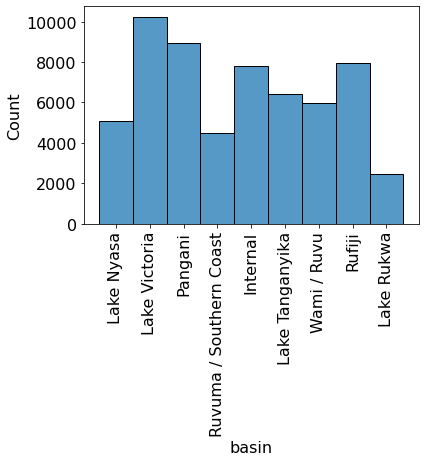

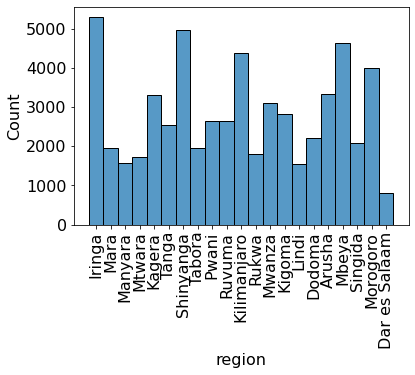

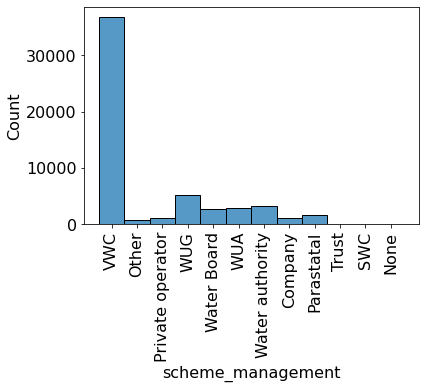

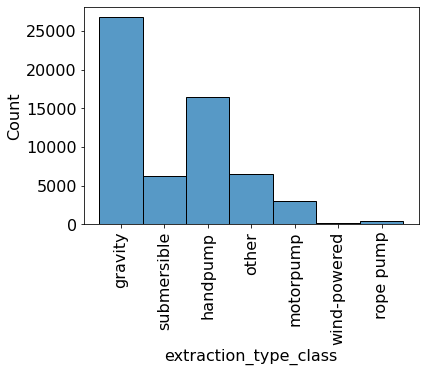

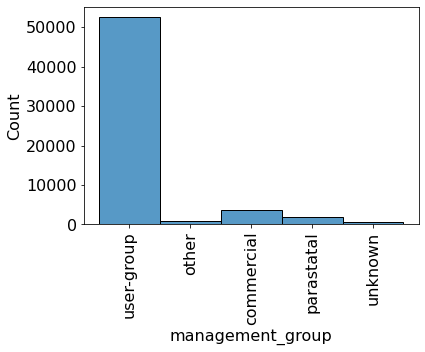

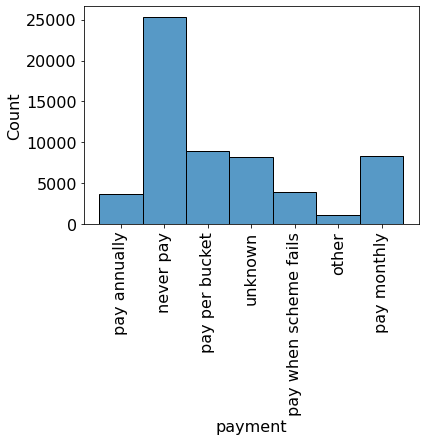

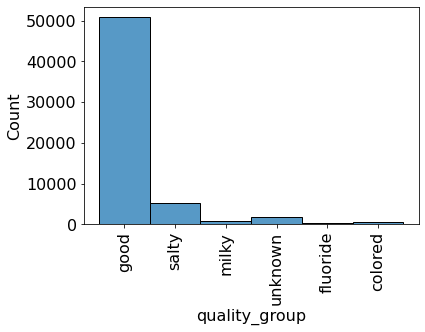

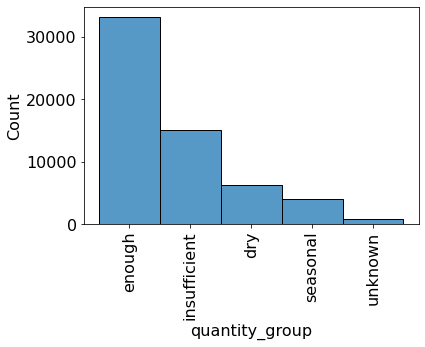

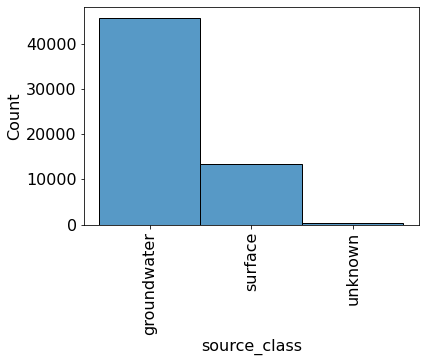

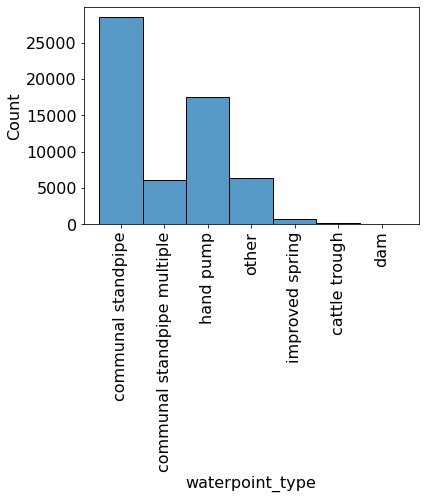

In [547]:
categorical_train = selector(dtype_include=object)
X_train_cat = X_train[categorical_train(X_train)]
X_train_cat = X_train_cat.drop(['permit', 'lga'], axis=1)

#creates categorical df from data in X_train

for x in X_train_cat:
    X_train_cat[x].value_counts(ascending=True)    
    sns.histplot(x=X_train_cat[x])
    plt.xticks(rotation=90)
    plt.show()
    
#loop plotting histograms for each category for EDA

From these graphs, it appears that `scheme_management` provided the most interesting information. This information can be used to inform the stakeholder that maintaining a good relationship with VWC will likely be in their best interest as the organization manages roughly 66% of waterpoints in this dataset. Below is the creation of a visualization for the final presentation as well as normalized value counts in order to see the proportion of the waterpoints VWC controls.

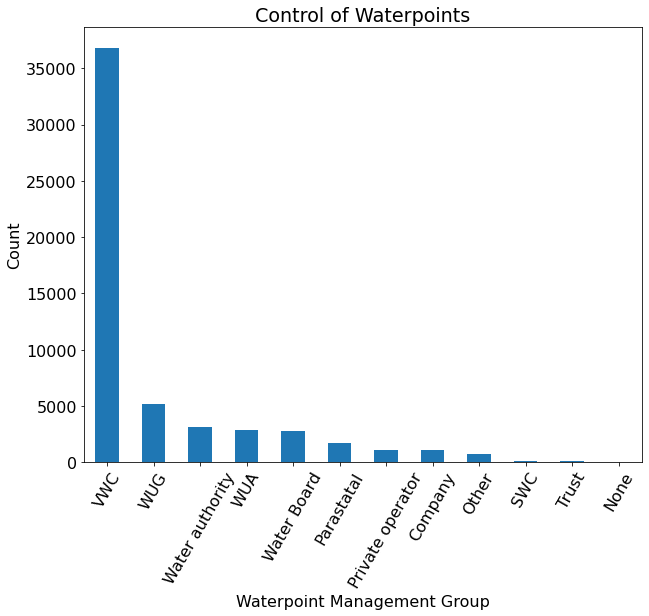

In [553]:
fig, ax = plt.subplots(figsize=(10,8))

plt.rcParams.update({'font.size': 16})

#set font size so that it is readable for presentation

X_train_cat.scheme_management.value_counts().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.title('Control of Waterpoints')
plt.xlabel('Waterpoint Management Group')
plt.savefig('pictures/waterpoint_control.png', bbox_inches='tight');

#plotting and saving the below figure

In [222]:
X_train_cat.scheme_management.value_counts(normalize=True)

VWC                 0.662662
WUG                 0.093763
Water authority     0.056787
WUA                 0.051924
Water Board         0.049493
Parastatal          0.030258
Private operator    0.019145
Company             0.019109
Other               0.013796
SWC                 0.001747
Trust               0.001297
None                0.000018
Name: scheme_management, dtype: float64

Now, it is time to utilize `analysis_df`. To do this, a function was created that takes the values of each column as well as the values in `status_group` and creates a new DataFrame with an index of `status_group` and columns equal to each unique value in the column entered. A more detailed explaination is provided below. A loop was created that applied this function to each feature. A list of the resulting DataFrames was then created.

In [95]:
def status_compare(column):

    functional_dict = {}
    repair_dict = {}
    nonfunctional_dict = {}
    
#creating dictionaries to quantify the count of each 
#status

    for value,status in zip(analysis_df[column],
                            analysis_df.status_group):
        
#taking values from input colunm and status_group and
#looping over them

        if status == 'functional':
            if value not in functional_dict.keys():
                functional_dict[str(value)] = 1
                
#adding the column value to and 1 to the dictionary if 
#the column value is not yet in the dictionary. this if
#statement applies to the status functional

            else:
                functional_dict[str(value)] += 1

#adds 1 to the value with the associated column value key
#if the column value is already in the dictionary

        elif status == 'functional needs repair':
            if value not in repair_dict.keys():
                repair_dict[str(value)] = 1
            else:
                repair_dict[str(value)] += 1
                
#same process as above, except for functional needs repair

        else: 
            if value not in nonfunctional_dict.keys():
                nonfunctional_dict[str(value)] = 1
            else:
                nonfunctional_dict[str(value)] += 1
                
#same process as above, except for nonfunctional                

        globals()[f'{column}_df'] = pd.DataFrame([
            functional_dict,
            repair_dict,
            nonfunctional_dict
        ],index=['Functional', 'Repair', 'Nonfunctional'])
    
#creates a global variable with the column name as 'columnname'_df
#with and index equal to the status groups

In [96]:
for cat in X_train_cat:
    status_compare(cat)
    
#applies the above function to all of the categorical features
    
# **** Note: This cell take a few minutes to run ****

In [97]:
feature_dfs = [
    basin_df,
    region_df,
    scheme_management_df,
    extraction_type_class_df,
    management_group_df,
    payment_df,
    quality_group_df,
    quantity_group_df,
    source_class_df,
    waterpoint_type_df
]

In [98]:
waterpoint_type_df.replace(waterpoint_type_df.dam[1], 0, inplace=True)

#replaces NaN values with 0

In [99]:
scheme_management_df.drop(['None','nan'], axis=1, inplace=True)

#replaces None/nan values with 0

Now that the `feature_dfs` have been created, a loop to convert the values to percentages is applied to each DataFrame in `features_df`. Then stacked bar plots are created in order to look for any interesting relationships between the feature values and the proportion of the functionality of the wells in each `status_group`.

In [101]:
index = 0

#creates an index for the below nested loop

for df in feature_dfs:
    for column in df:
        
#loop over each df in the feature_df list and then 
#looping over each individual column in the df

        column_sum = sum(df[column])

#taking the sum of the column and assigning it to
#the variable column sum
    
        for status_count in df[column]:
            df.replace(df[column][index], status_count/column_sum, inplace=True)

#looping over each value in the columns and replacing
#the value with the percentage of the column

            index += 1
            if index == 3:
                index = 0

#since there are only 3 rows, when index reaches 3 it
#resets so that it can replace the correct values in the
#next column 

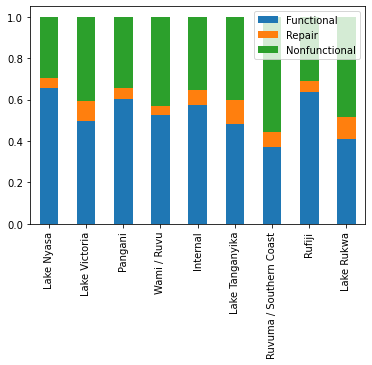

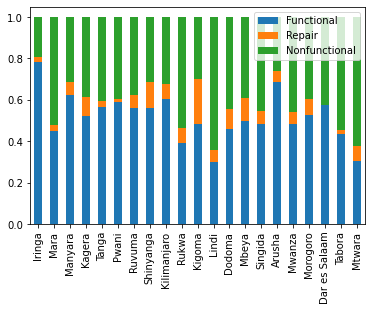

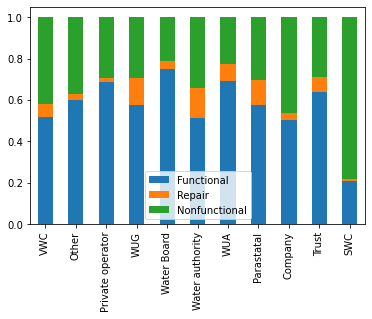

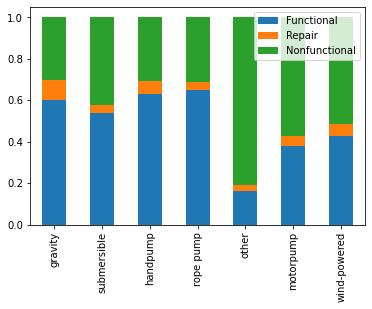

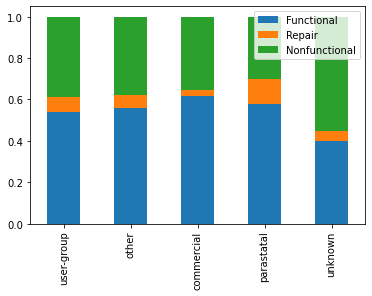

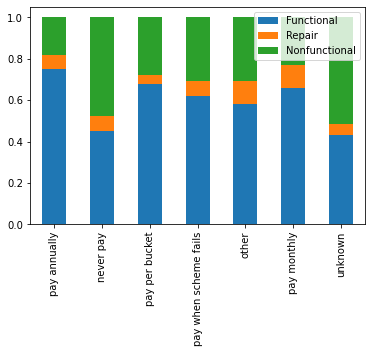

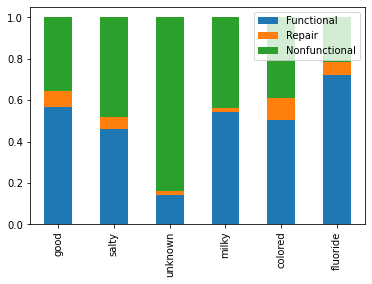

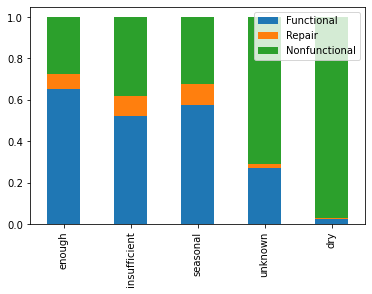

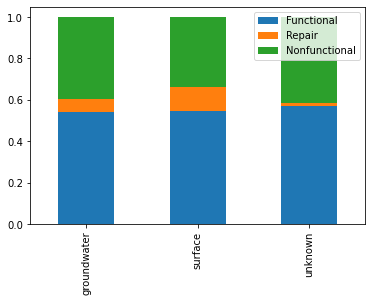

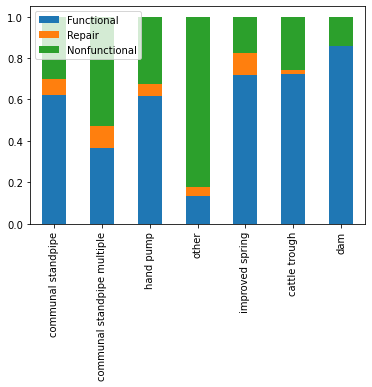

In [103]:
for df in feature_dfs:
    df.T.plot.bar(stacked=True)

I appears that `region` and `waterpoint_type` provide the most useful information for stakeholder recommendations based on the above stack bar plots. The top five regions with the highest proportion of nonfunctional waterpoints, as well as the region with the highest proportion of waterpoints in need of repair, were chosen. A visualization was then created with this information. Note that the `Functional` status was removed as the stakeholders are more interested in the other two statuses. The process of creating the new `region` stacked bar plot is detailed below.

In [126]:
region_df.T.Nonfunctional.sort_values(ascending=False)

Lindi            0.642303
Mtwara           0.624277
Tabora           0.544155
Rukwa            0.534292
Mara             0.519553
Mwanza           0.456802
Singida          0.455805
Dodoma           0.446615
Dar es Salaam    0.423602
Tanga            0.407538
Morogoro         0.396156
Pwani            0.395825
Mbeya            0.391464
Kagera           0.387515
Ruvuma           0.377273
Kilimanjaro      0.323590
Manyara          0.315856
Shinyanga        0.312726
Kigoma           0.301847
Arusha           0.262985
Iringa           0.194560
Name: Nonfunctional, dtype: float64

In [127]:
region_df.T.Repair.sort_values(ascending=False)

Kigoma           0.214134
Shinyanga        0.127459
Mbeya            0.108644
Dodoma           0.094957
Kagera           0.091677
Morogoro         0.074888
Rukwa            0.074668
Kilimanjaro      0.073533
Mtwara           0.072832
Ruvuma           0.062121
Singida          0.061156
Manyara          0.060644
Lindi            0.060155
Mwanza           0.058994
Arusha           0.052239
Mara             0.030472
Tanga            0.028661
Iringa           0.023234
Tabora           0.022971
Pwani            0.013662
Dar es Salaam    0.003727
Name: Repair, dtype: float64

In [249]:
regions = [
    'Lindi',
    'Mtwara',
    'Rukwa',
    'Tabora',
    'Mara',
    'Kigoma']

#create a list of regions for visualization

In [250]:
new_cols = ["Nonfunctional", "Repair"]
re_vis_df = (region_df[regions]*100).drop("Functional").T[new_cols]

#defines a dataframe that multiplies each value by 100,
#drops the functional status, transposes the previous df
#and reorders the columns

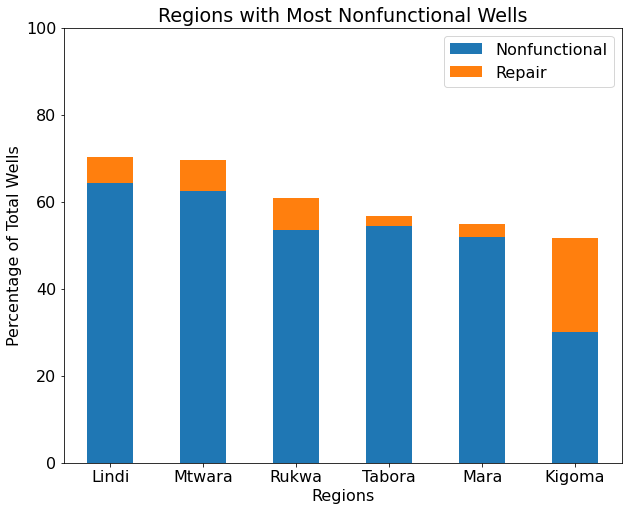

In [464]:
re_vis_df.plot.bar(stacked=True,
                                    xlabel='Regions',
                                    ylabel='Percentage of Total Wells',
                                    title='Regions with Most Nonfunctional Wells',
                                   figsize=(10,8))
plt.ylim(top=100)
plt.xticks(rotation=0)
plt.savefig('pictures/regions.png', bbox_inches='tight');

#plotting and saving the figure using the above df

The only remaining visualization to create is for `waterpoint_type`. In order the give the stakeholders more context, it is worth provided a cleaner version of the value counts for `waterpoint_type`. This visualization is created below.

In [548]:
wp_fig = X_train_cat.waterpoint_type
wp_fig = wp_fig.str.title()
wp_fig = pd.DataFrame(wp_fig.value_counts())

#creates a dataframe equal to the value counts for 
#waterpoint type and changes the values to title case

wp_fig.rename(index={'Communal Standpipe':'Communal\n Standpipe',
                     'Communal Standpipe Multiple':'Communal\n Standpipe\n Multiple',
                     'Hand Pump':'Hand\n Pump',
                     'Improved Spring': 'Improved\n Spring',
                     'Cattle Trough': 'Cattle\n Trough'},
             inplace=True)

#renaming columns to wrap text for cleaner visualization

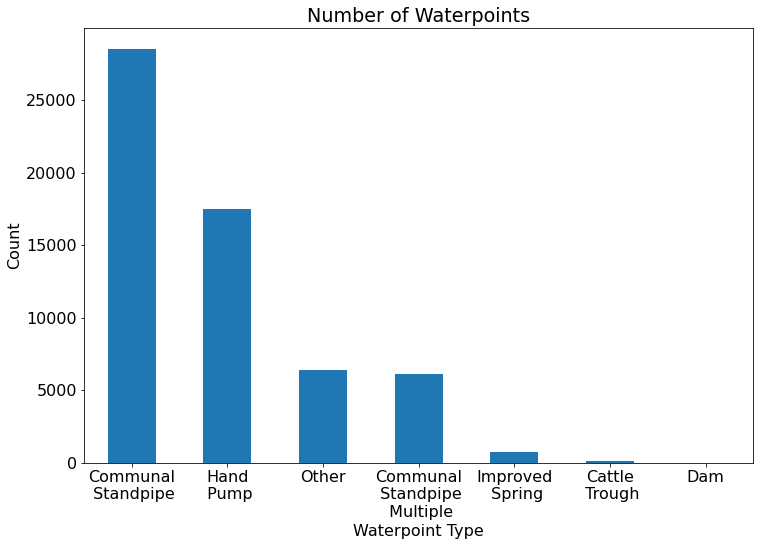

In [551]:
ax = wp_fig.plot(kind='bar', figsize=(12,8),legend=False)
plt.xticks(rotation=0)
plt.title('Number of Waterpoints')
plt.xlabel('Waterpoint Type')
plt.ylabel('Count')
plt.savefig('pictures/waterpoint_count.png', bbox_inches='tight');

#plotting the new df created above

Finally, the visualization for the stacked bar plot of `waterpoint_type` is created below. This will be the final visualization necessary before the modelling phase of the project. Overall, the visualizations in this section provide context into which areas the stakeholders should focus on.

In [242]:
waterpoints = [
    'other',
    'communal standpipe multiple',
    'hand pump',
    'communal standpipe'
]

In [532]:
new_cols = ["Nonfunctional", "Repair"]
wp_vis_df = (waterpoint_type_df[waterpoints].drop("Functional")*100).T[new_cols]
wp_vis_df.index = wp_vis_df.index.str.title()
wp_vis_df.rename(index={'Communal Standpipe':'Communal\n Standpipe',
                        'Communal Standpipe Multiple':'Communal\n Standpipe\n Multiple'},
                 inplace=True) 

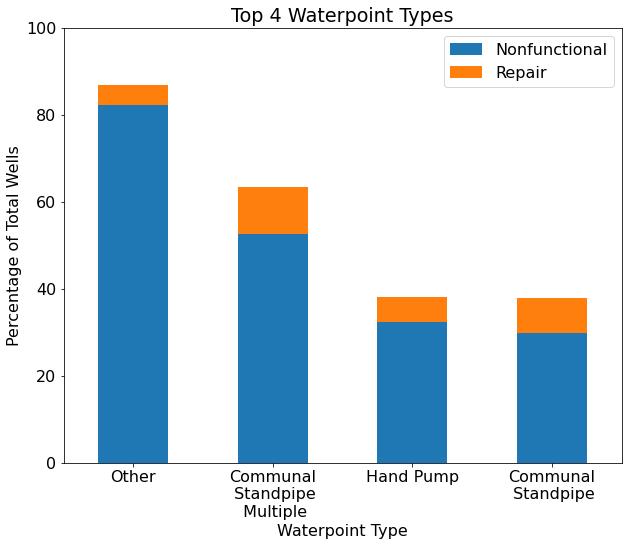

In [495]:
wp_vis_df.plot.bar(stacked=True,
                   xlabel='Waterpoint Type',
                   ylabel='Percentage of Total Wells',
                   title='Top 4 Waterpoint Types',
                   figsize=(10,8))
plt.ylim(top=100)
plt.xticks(rotation=0)

plt.savefig('pictures/waterpoints.png', bbox_inches='tight');

## Modelling

Now that the EDA is completed, it is time to begin modelling. The first step was to convert the `contruction_year` values to a string object, as they will be treated as a categorical rather than a numberical variable. Pipelines are then set up for the numerical and categorical data. The `numeric_pipe` replaces any missing values with the mean and then scales the data, while the `category_pipe` replaces any missing values with the most frequent value and then seperates them into distinct categories with OneHotEncoder. A column transformer was then defined to apply the `category_pipe` and the `numeric_pipe`

In [165]:
X_train.construction_year = X_train.construction_year.map(str).astype(object)

In [166]:
numeric_pipe = Pipeline([
    ('num_impute', SimpleImputer(strategy='mean')),
    ('ss', StandardScaler())
])

#creates a pipeline to impute and scale numeric data

category_pipe = Pipeline([
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

#creates a pipeline to impute and onehotencode categorical data

In [167]:
Preprocessing = ColumnTransformer(transformers=[
    ('num_trans', numeric_pipe, selector(dtype_include=np.number)),
    ('cat_trans', category_pipe, selector(dtype_include=object))
],remainder='passthrough')

#column transformer utilizing both of the above pipelines

A `Evaluation` class was then created to make viewing CV results for each model simple. A baseline model was then created using DummyClassifier. This predicted `functional` for every data point. This resulted in an accuracy of 54.308% which should be fairly simple to improve on.

In [168]:
class Evaluation():
    
#creates a class to evaluate the performance of a trained
#model
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y

        self.cv_results = None
        self.cv_mean = None
        self.cv_std = None

        if cv_now:
            self.cross_validate()

#initiates the objects attributes including model, name,
#X, y, cv_results, cv_mean, and cv_std. on initialization,
#a cross validation is also applied given that cv_now=True
#which is the default
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_std = np.std(self.cv_results)
        
#a function that takes in X and y and returns the cross val
#score as well as the mean and std from this scoring

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)
        
#creates a definition for the class in order to easily print
#out the cv_results for a model

In [172]:
baseline_model = Pipeline([
    ('preprocessing', Preprocessing),
    ('Baseline', DummyClassifier(strategy='most_frequent'))
])

baseline_model_pipe = Evaluation(baseline_model,model_name='Basline',X=X_train,y=y_train)

baseline_model_pipe.print_cv_summary()

CV Results for `Basline` model:
            0.54308 ± 0.00005 accuracy
        


Now that a baseline model has been created, it is time to create a first simple model. In order to find which model performs the best for this data, a list of models was created and then looped over. The results are printed below and the `Random_Forest` model performed the best with an accuracy of 78.707%. `XGBoost` performed nearly as well with an accuracy of 78.109%. If there were less time constraints it may have been useful to test both models; however, due to limited time, the `Random_Forest` model will be used as our first simple model and will be the focus of training and improving.

In [173]:
classifiers = [
    LogisticRegression(max_iter=10000),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    xgboost.XGBClassifier()
]

#create a list of classifiers to test for a first simple
#model

i=0

mod_name = [
    'Logistic_Regression',
    'KNN',
    'Decision_Tree',
    'Random_Forest',
    'GradientBoosting',
    'AdaBoost',
    'XGBoost'
]

#create a list of model names. i is an index that will allow
#the below loop to print out the correct model names

for classifier in classifiers:
    
#looping over all of the above classifiers
    
    model = Pipeline([
        ('preprocessing', Preprocessing),
        (mod_name[i], classifier)
    ])
    
#preprocessing for each model using ColumnTransformer
    
    model_pipe = Evaluation(model,model_name=mod_name[i], X=X_train, y=y_train)
    
#using the Evaluation class to evaluate the cv results
    
    model_pipe.print_cv_summary()
    
    i += 1

#finally printing the cv results and adding 1 to the index

CV Results for `Logistic_Regression` model:
            0.74643 ± 0.00654 accuracy
        
CV Results for `KNN` model:
            0.77145 ± 0.00475 accuracy
        
CV Results for `Decision_Tree` model:
            0.75739 ± 0.00715 accuracy
        
CV Results for `Random_Forest` model:
            0.78707 ± 0.00625 accuracy
        
CV Results for `GradientBoosting` model:
            0.74613 ± 0.00547 accuracy
        
CV Results for `AdaBoost` model:
            0.71668 ± 0.00520 accuracy
        
CV Results for `XGBoost` model:
            0.78109 ± 0.00489 accuracy
        


In order to tune the model paramameters, GridSearchCV was utilized. This allowed multiple parameters to be checked at once and returned the best performing parameter. Since the `Random_Forest` model performed the best, this model was used to grid search on a total of five times in order to get the optimal parameters for the data selected for this project. The runtimes for the models are included in the comments under the `params_rf` declarations.

In [174]:
params_rf = {
    'rand_forest__n_estimators':[25,50,75,250],
    'rand_forest__max_features':['auto',10, 20, 30, 40],
    'rand_forest__min_samples_leaf':[1, 3, 5, 10],
    'rand_forest__bootstrap':[True, False],
    'rand_forest__min_samples_split':[2,5,10]
}

#runtime = 537.4 mins

In [175]:
params_rf = {
    'rand_forest__n_estimators':[250, 500, 750, 1000, 2500],
    'rand_forest__max_features':['auto'],
    'rand_forest__min_samples_leaf':[1],
    'rand_forest__bootstrap':[True],
    'rand_forest__min_samples_split':[10, 20, 30, 40, 50]
}

#runtime = 141.5 mins

In [176]:
params_rf = {
    'rand_forest__n_estimators':[200, 250, 300],
    'rand_forest__max_features':['auto'],
    'rand_forest__min_samples_leaf':[1],
    'rand_forest__bootstrap':[True],
    'rand_forest__min_samples_split':[7,10,15]
}

#runtime = 16.4 mins

In [177]:
params_rf = {
    'rand_forest__n_estimators':[100,125,150,175,200,225],
    'rand_forest__oob_score':[True],
    'rand_forest__min_samples_split':[8,9,10,11,12]
}

#runtime = 45.1 mins

In [ ]:
params_rf = {
    'rand_forest__n_estimators':[130,135,140,145,150,155,160,165],
    'rand_forest__oob_score':[True],
    'rand_forest__min_samples_split':[8,9,10]
}

#runtime = 34.9 mins

Below is the code for the grid search. This code has been intentionally left out to prevent rerunning all of the testing, as the runtime totalled 775.3 mins which is nearly 13 hours.

`gs_rf = GridSearchCV(estimator=rand_forest_model, param_grid=params_rf, verbose=1)`

After 5 iterations, the best parameters were found. The definition of and fitting of the final model can be seen below. The final model performed at 79.709% accuracy which is not bad given the timeframe of the project.

In [178]:
final_model = Pipeline([
    ('preprossesing', Preprocessing),
    ('test', RandomForestClassifier(bootstrap=True,
                                     min_samples_split=9,
                                     n_estimators=135,
                                    oob_score=True))
])

final_pipe = Evaluation(final_model,model_name='test',X=X_train, y=y_train)

final_pipe.print_cv_summary()

CV Results for `test` model:
            0.79709 ± 0.00446 accuracy
        


In [179]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprossesing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002A329B70670>),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                 

The next step was optional; however, I decided to continue with it since it is fairly simple. This data set was part of a competition to predict the test data (`y_test`) most accurately. To submit my results, I simply found the predicted values for `X_test`, replaced these values in the `sub` DataFrame, and then saved it as a .csv file.

In [181]:
y_pred_test = final_model.predict(X_test)

In [ ]:
sub.status_group = y_pred_test

In [182]:
sub.to_csv('data/submission.csv', index=False)

The final step was to create a visualization detailing how well the model performed for the presentation. This was done by creating `y_pred` using the `final_model` to predict on `X_train`. This was then turned into a matrix and then a DataFrame. The values were then coverted to percentages and plotted. As seen below, the model performed at roughly 81.2% when predicting `Functional`, 74.1% when predicting `Repair`, and 87.6% when predicting `Non-Functional`. Overall, this model performed really well for the business problem as `Repair` and `Non-Functional` predictions were the most important for project. In addition, `Non-Functional` represents a larger proportion of the data than `Repair` so it extremely useful that `Non-Functional` performed better than `Repair`.

In [359]:
y_pred = final_model.predict(X_train)

In [541]:
cm = confusion_matrix(y_train, y_pred)
cm_df = pd.DataFrame(cm)

label = ['Functional\n Accuracy',
         'Needs Repair\n Accuracy',
         'Non-Functional\n Accuracy']

height = [(cm_df[0][0]/sum(cm_df[0]))*100,
          (cm_df[1][1]/sum(cm_df[1]))*100,
          (cm_df[2][2]/sum(cm_df[2]))*100]

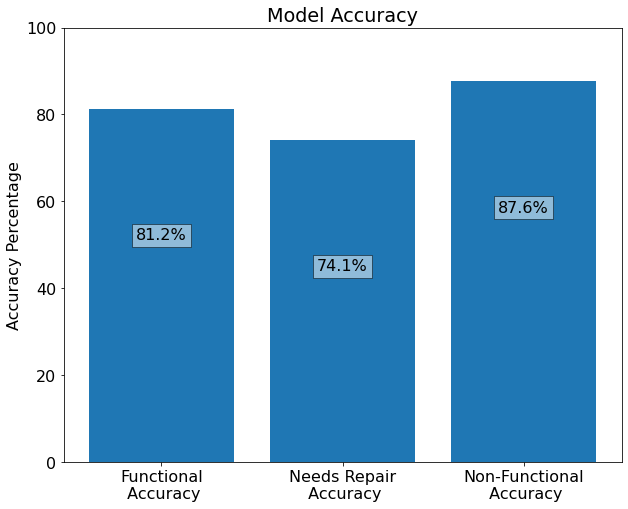

In [552]:
fig, ax = plt.subplots(figsize=(10,8))

plt.bar(x=label, height=height)
xlocs, xlabs = plt.xticks()
plt.ylim(top=100)
plt.ylabel('Accuracy Percentage')
plt.title('Model Accuracy')
for i, j in enumerate(height):
    plt.text(xlocs[i],
             j-30,
             ((str(round(j,1)))+'%'),
             ha ='center',
             bbox = dict(facecolor = 'white', alpha = .5))
plt.savefig('pictures/accuracy.png', bbox_inches='tight');    

## Results and Evaluation

Overall, the EDA and model provided a good basis for recommendations to an NGO seeking to repair and replace waterpoints in Tanzania. The graphs created in the EDA showed that some important factors for the NGO to consider are the regions in which to work, important organizations to collaborate with, and which waterpoint types need replacing and are the most effective. The top five regions with the highest proportion of Non-Functional wells, Lindi, Mtwara, Tabora, Rukwa, and Mara, as well as the region with the highest number of wells in need of repair, Kigoma, were considered to be the best starting points in the NGO's efforts. In addition, VWC, the Village Water Committee, appears to control appears to control roughly 66% of the waterpoints provided in this dataset. Therefore, building a positive relationship with this organization is key for a successful project. The waterpoint type was also examined. The results showed that multiple communal standpipes and waterpoints classified as 'other' were not reliable, while single communal standpipes and hand pumps appear to be much more reliable. Finally, the model performed at 87.6% when predicting Nonfunctional wells which will aid in predicting nonfunctional wells in the future.

## Conclusion

Overall, this EDA and modelling were able to provide solid recommendations to an NGO seeking to repair and replace wells in Tanzania. The EDA was used to give recommendations to the NGO independant of the model and then the model was created to predict on future unknown data. A baseline model was constructed using a DummyClassifier and then, after testing multiple models, a RandomForestClassifier was chosen as it performed the best. This model was then tuned into the final model which did a solid job of predicting the target.